In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"norihisa","key":"d016ea67c3249f44d2090f6c16a2ade1"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [10]:
# ※kaggleのサイトで認証が必要
!kaggle datasets download -d olgabelitskaya/style-color-images

 93% 131M/142M [00:00<00:00, 108MB/s]
100% 142M/142M [00:00<00:00, 153MB/s]


In [11]:
!unzip style-color-images.zip

Archive:  style-color-images.zip
  inflating: StyleColorImages.h5     
  inflating: style/0_0_001.png       
  inflating: style/0_0_002.png       
  inflating: style/0_0_003.png       
  inflating: style/0_0_004.png       
  inflating: style/0_0_005.png       
  inflating: style/0_0_006.png       
  inflating: style/0_0_007.png       
  inflating: style/0_0_008.png       
  inflating: style/0_0_009.png       
  inflating: style/0_0_010.png       
  inflating: style/0_0_011.png       
  inflating: style/0_0_012.png       
  inflating: style/0_0_013.png       
  inflating: style/0_0_014.png       
  inflating: style/0_0_015.png       
  inflating: style/0_0_016.png       
  inflating: style/0_0_017.png       
  inflating: style/0_0_018.png       
  inflating: style/0_0_019.png       
  inflating: style/0_0_020.png       
  inflating: style/0_0_021.png       
  inflating: style/0_0_022.png       
  inflating: style/0_0_023.png       
  inflating: style/0_0_024.png       
  inflating: styl

In [12]:
!unzip style.zip

unzip:  cannot find or open style.zip, style.zip.zip or style.zip.ZIP.


In [13]:
!mkdir style

mkdir: cannot create directory ‘style’: File exists


In [14]:
mv *.png style

mv: cannot stat '*.png': No such file or directory


In [0]:
from keras.applications import vgg16
from keras.applications import vgg19
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [0]:
files = ['/content/style/' + x for x in os.listdir('/content/style/') if "png" in x]

In [0]:
imgs_path = "../input/style/"
imgs_model_width, imgs_model_height = 224, 224

nb_closest_images = 5

In [28]:
vgg_model = vgg19.VGG19(weights='imagenet')

# 予測の代わりに特徴量を取得するために、最後のFC層を削除する
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# モデルを表示
feat_extractor.summary()

574717952/574710816 [==============================] - 6s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [0]:
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

In [30]:
imgs_features = feat_extractor.predict(processed_imgs)
imgs_features.shape

(2184, 4096)

In [31]:
cosSimilarities = cosine_similarity(imgs_features)

# 結果をPandasのデータフレームに保存する。
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/style/1_6_012.png,/content/style/1_1_021.png,/content/style/6_8_021.png,/content/style/4_2_002.png,/content/style/5_2_029.png,/content/style/4_4_030.png,/content/style/0_0_033.png,/content/style/3_2_025.png,/content/style/2_4_012.png,/content/style/3_2_012.png,/content/style/2_2_046.png,/content/style/3_7_024.png,/content/style/1_7_015.png,/content/style/3_1_007.png,/content/style/1_8_024.png,/content/style/2_4_004.png,/content/style/5_2_036.png,/content/style/4_2_012.png,/content/style/4_7_026.png,/content/style/6_3_011.png,/content/style/4_1_026.png,/content/style/3_6_004.png,/content/style/6_3_021.png,/content/style/2_0_011.png,/content/style/0_8_003.png,/content/style/4_6_069.png,/content/style/0_0_095.png,/content/style/1_5_022.png,/content/style/4_2_052.png,/content/style/4_9_025.png,/content/style/4_6_014.png,/content/style/2_0_060.png,/content/style/2_0_063.png,/content/style/4_6_030.png,/content/style/2_2_025.png,/content/style/3_4_012.png,/content/style/3_6_016.png,/content/style/3_7_020.png,/content/style/3_2_019.png,/content/style/4_1_005.png,...,/content/style/4_1_044.png,/content/style/1_3_002.png,/content/style/1_1_001.png,/content/style/1_2_033.png,/content/style/4_6_066.png,/content/style/2_0_023.png,/content/style/1_2_006.png,/content/style/4_9_045.png,/content/style/5_2_061.png,/content/style/5_2_055.png,/content/style/4_1_030.png,/content/style/6_1_047.png,/content/style/6_1_028.png,/content/style/2_7_003.png,/content/style/2_0_024.png,/content/style/2_2_012.png,/content/style/5_2_004.png,/content/style/4_1_040.png,/content/style/1_0_029.png,/content/style/5_6_010.png,/content/style/3_0_042.png,/content/style/3_5_004.png,/content/style/0_0_052.png,/content/style/3_3_004.png,/content/style/2_0_042.png,/content/style/1_2_008.png,/content/style/6_9_009.png,/content/style/5_7_008.png,/content/style/3_0_055.png,/content/style/6_9_014.png,/content/style/5_2_018.png,/content/style/3_6_047.png,/content/style/3_6_002.png,/content/style/1_6_021.png,/content/style/6_1_037.png,/content/style/6_2_019.png,/content/style/3_2_059.png,/content/style/2_0_056.png,/content/style/3_4_007.png,/content/style/4_6_078.png
/content/style/1_6_012.png,1.000000,0.178816,0.135761,0.221255,0.208135,0.128753,0.162836,0.322847,0.108927,0.180244,0.236269,0.335445,0.340009,0.183708,0.145687,0.126050,0.188290,0.213189,0.204163,0.164997,0.181637,0.130286,0.244392,0.257204,0.115711,0.176180,0.357705,0.290079,0.264664,0.151418,0.406073,0.257548,0.211053,0.164903,0.104046,0.184198,0.224028,0.434703,0.227835,0.238187,...,0.154774,0.207397,0.216044,0.250411,0.239744,0.186112,0.267685,0.139163,0.195143,0.210161,0.128580,0.161253,0.236777,0.167751,0.176117,0.222371,0.310159,0.160158,0.199908,0.213348,0.191007,0.279155,0.178883,0.242674,0.156824,0.234268,0.219445,0.213678,0.246135,0.212678,0.197382,0.288203,0.278246,0.385010,0.154140,0.263743,0.256915,0.245830,0.206231,0.188719
/content/style/1_1_021.png,0.178816,1.000000,0.202168,0.239064,0.304876,0.168328,0.235326,0.272793,0.159684,0.282725,0.206745,0.208580,0.292100,0.777866,0.152708,0.166001,0.338245,0.233054,0.233375,0.547691,0.694074,0.234031,0.459385,0.276122,0.206102,0.218739,0.222715,0.263144,0.149605,0.265858,0.322355,0.202813,0.294427,0.202186,0.177375,0.254159,0.216613,0.246893,0.272036,0.794659,...,0.322364,0.504089,0.914150,0.276373,0.232297,0.286908,0.259515,0.246014,0.198701,0.211735,0.704550,0.369678,0.692134,0.349515,0.179549,0.288975,0.294546,0.626605,0.246951,0.256335,0.230574,0.230551,0.254869,0.466259,0.207242,0.350466,0.209873,0.268441,0.211926,0.275126,0.358891,0.271536,0.178945,0.237268,0.534296,0.199848,0.286251,0.251935,0.180508,0.255664
/content/style/6_8_021.png,0.135761,0.202168,1.000000,0.246992,0.439900,0.212736,0.393011,0.288446,0.196056,0.294385,0.438179,0.204357,0.258924,0.177898,0.495626,0.147105,0.328682,0.210005,0.201980,0.308622,0.244605,0.381833,0.192129,0.386405,0.309907,0.334423,0.380785,0.377631,0.207608,0.164053,0.279859,0.280855,0.357736,0.310609,

In [0]:
def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


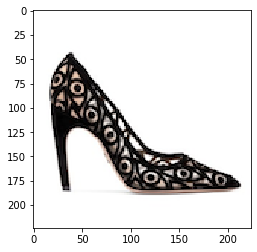

-----------------------------------------------------------------------
most similar products:


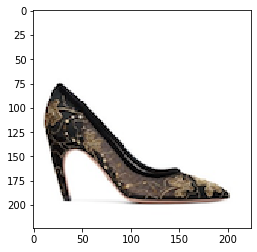

similarity score :  0.7549667


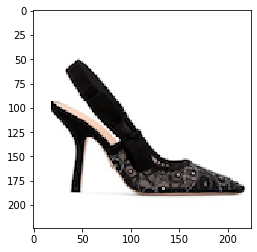

similarity score :  0.7177706


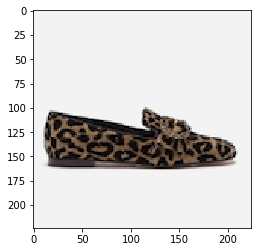

similarity score :  0.6953301


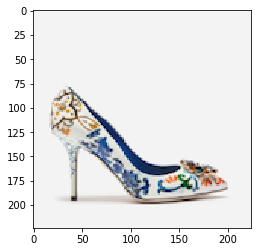

similarity score :  0.694958


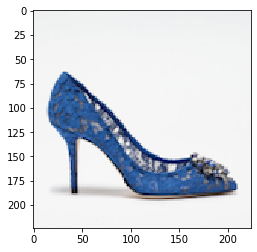

similarity score :  0.69241285


In [33]:
retrieve_most_similar_products(files[380])